# RNN international airline passengers

## Loading and Visualizing Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
# Importing the libraries
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')
    
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation



Using TensorFlow backend.


In [2]:
#skiprows,skipfooter=Number of lines at bottom of file to skip 

data = pd.read_csv('input/international-airline-passengers.csv',skipfooter=3,engine='python')
data.tail() 

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [3]:
data

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


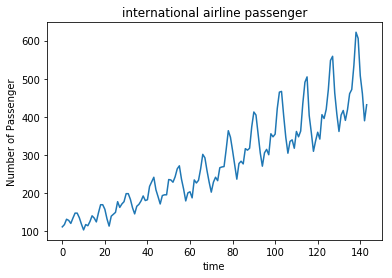

In [5]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

 ##  Preprocessing Data
    reshape
    change type
    scaling
    train test split
    Create dataset

In [6]:
dataset.shape

(144,)

In [7]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [8]:
dataset[:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

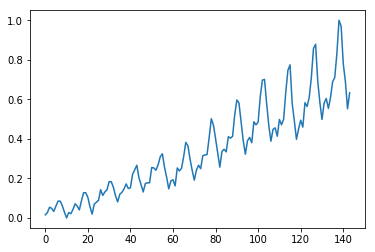

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = scaler.fit_transform(dataset)
plt.plot(dataset_scaled)
plt.show()

In [10]:
dataset_scaled[:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

In [11]:
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train = dataset_scaled[0:train_size,:]
test = dataset_scaled[train_size:,:]
print("train size: {}, test size: {} ".format(len(train), len(test)))


train size: 86, test size: 58 


In [12]:

time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [13]:
trainX.shape

(75, 10)

In [14]:
trainY.shape

(75,)

In [15]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)

shape of trainX:  (75, 10, 1)
shape of testX:  (47, 10, 1)


## Create SimpleRNN  Model

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (trainX.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 30,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fifth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 20))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 100)           10200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10, 80)            14480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10, 50)            6550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 10, 30)            2430      
__________

In [18]:
# Fitting the RNN to the Training set
regressor.fit(trainX, trainY, epochs = 250, batch_size = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/250
75/75 [==============================] - 2s 25ms/step - loss: 0.0360
Epoch 2/250
75/75 [==============================] - 0s 802us/step - loss: 0.0133
Epoch 3/250
75/75 [==============================] - 0s 797us/step - loss: 0.0151
Epoch 4/250
75/75 [==============================] - 0s 769us/step - loss: 0.0108
Epoch 5/250
75/75 [==============================] - 0s 789us/step - loss: 0.0086
Epoch 6/250
75/75 [==============================] - 0s 786us/step - loss: 0.0090
Epoch 7/250
75/75 [==============================] - 0s 789us/step - loss: 0.0084
Epoch 8/250
75/75 [==============================] - 0s 837us/step - loss: 0.0071
Epoch 9/250
75/75 [==============================] - 0s 836us/step - loss: 0.0107
Epoch 10/250
75/75 [==============================] - 0s 802us/step - loss: 0.0087
Epoch 11/250
75/75 [==============================] - 0s 795us/step - loss: 0.0087
Epoch 12/250
75/75 [=============================

## Predictions and Visualising RNN Model

In [19]:
import math 
from sklearn.metrics import mean_squared_error

trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)


In [20]:
trainPredict.shape

(75, 1)

In [21]:
trainPredict[:10]

array([[0.04225868],
       [0.03299519],
       [0.04412068],
       [0.05023387],
       [0.04410781],
       [0.05794881],
       [0.06242587],
       [0.07713503],
       [0.09450262],
       [0.0978476 ]], dtype=float32)

In [22]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
trainPredict[:10]

array([[125.89    ],
       [121.09151 ],
       [126.854515],
       [130.02115 ],
       [126.84785 ],
       [134.01747 ],
       [136.33661 ],
       [143.95595 ],
       [152.95236 ],
       [154.68506 ]], dtype=float32)

In [24]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 14.68 RMSE
Test Score: 49.97 RMSE


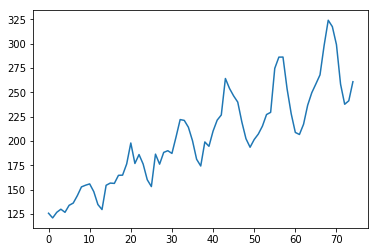

In [25]:
plt.plot(trainPredict)

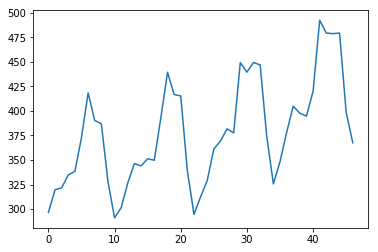

In [26]:
plt.plot(testPredict)

In [27]:
dataset.shape

(144, 1)

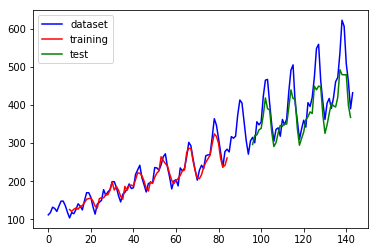

In [28]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_scaled), color='b',label="dataset")
plt.plot(trainPredictPlot, color='r',label="training")
plt.plot(testPredictPlot, color='g',label="test")
plt.legend()
plt.show()

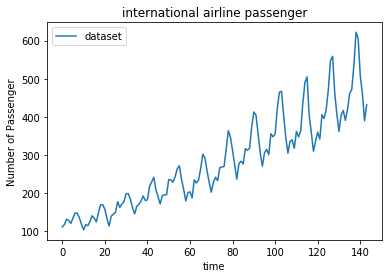

In [29]:
dataset = data.iloc[:,1].values
plt.plot(dataset,label="dataset")
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.legend()
plt.show()